In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

In [2]:
path = 'enem_small_data/'
file = 'Microdados_ENEM_Amostra_'

In [3]:
# Copiei do stack overflow temporariamente

def display_dfs(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center">{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:top"> {df.head().to_html(index=False)}</td>' 
                         for df in dfs) + 
                 '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [4]:
plt.ion()
plt.rcParams['figure.figsize']  = (8, 5)

In [5]:
df2018 = pd.read_csv(path+file+'2018.csv', sep=',',  encoding='latin-1', usecols=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']).dropna()

In [6]:
df2018.loc[:,'Media'] = df2018.sum(axis=1)/len(df2018.columns)

In [7]:
dfs = list([df2018[['NU_NOTA_CN']], 
            df2018[['NU_NOTA_CH']],
            df2018[['NU_NOTA_LC']], 
            df2018[['NU_NOTA_MT']], 
            df2018[['NU_NOTA_REDACAO']], 
            df2018[['Media']]])

In [8]:
display_dfs(dfs, ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Media'])

NU_NOTA_CN NU_NOTA_CH NU_NOTA_LC NU_NOTA_MT NU_NOTA_REDACAO Media 
 
 
 NU_NOTA_CN 
 
 
 
 
 417.4 
 
 
 401.1 
 
 
 628.0 
 
 
 390.9 
 
 
 427.9 
 
 
 
 
 
 NU_NOTA_CH 
 
 
 
 
 481.5 
 
 
 573.5 
 
 
 652.6 
 
 
 600.5 
 
 
 543.1 
 
 
 
 
 
 NU_NOTA_LC 
 
 
 
 
 496.5 
 
 
 466.8 
 
 
 581.7 
 
 
 598.7 
 
 
 426.1 
 
 
 
 
 
 NU_NOTA_MT 
 
 
 
 
 504.3 
 
 
 509.8 
 
 
 440.7 
 
 
 564.5 
 
 
 457.8 
 
 
 
 
 
 NU_NOTA_REDACAO 
 
 
 
 
 320.0 
 
 
 340.0 
 
 
 860.0 
 
 
 480.0 
 
 
 340.0 
 
 
 
 
 
 Media 
 
 
 
 
 443.94 
 
 
 458.24 
 
 
 632.60 
 
 
 526.92 
 
 
 438.98

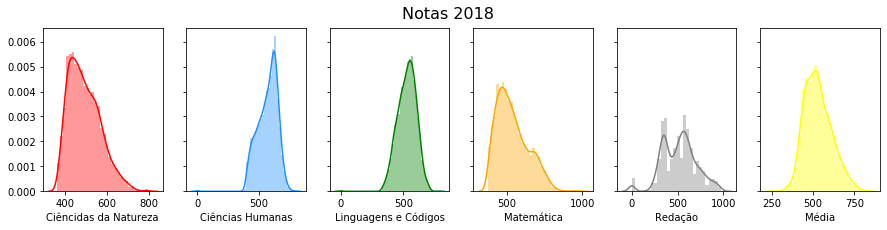

In [16]:
fig, axes = plt.subplots(1, 6, figsize=(15, 3), sharey=True)
colors = ['red', 'dodgerblue', 'green', 'orange', 'gray', 'yellow']
labels = ['Ciêncidas da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média']
for i in range(len(dfs)):
    sns.distplot(dfs[i], color = colors[i], ax = axes[i], axlabel = labels[i])
fig.suptitle(("Notas 2018"), fontsize=16)
plt.show()